In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import xgboost
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_df = pd.read_csv('titanic_data/train.csv')
test_df = pd.read_csv('titanic_data/test.csv')

In [3]:
train_df.shape

(891, 12)

In [4]:
test_df.shape

(418, 11)

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
train_df.shape

(891, 12)

In [12]:
train_df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
numeric_cols = train_df.select_dtypes(include=np.number).columns

In [15]:
numeric_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [16]:
target_col = "Survived" 

In [17]:
train_df.drop('PassengerId', axis=1, inplace=True)

In [18]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
matplotlib.rcParams['figure.figsize'] = (12, 6)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

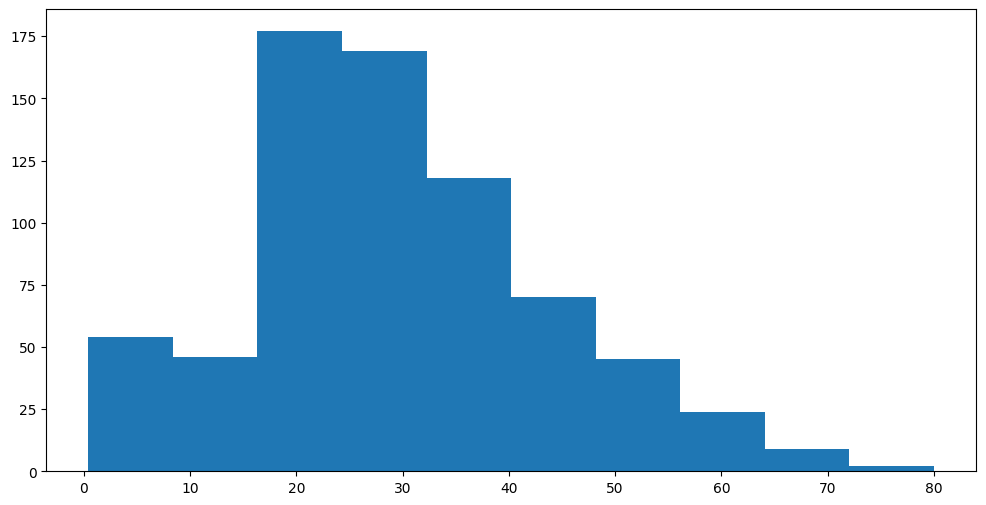

In [20]:
plt.hist(
    data=train_df,
    x='Age'
)

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <BarContainer object of 30 artists>)

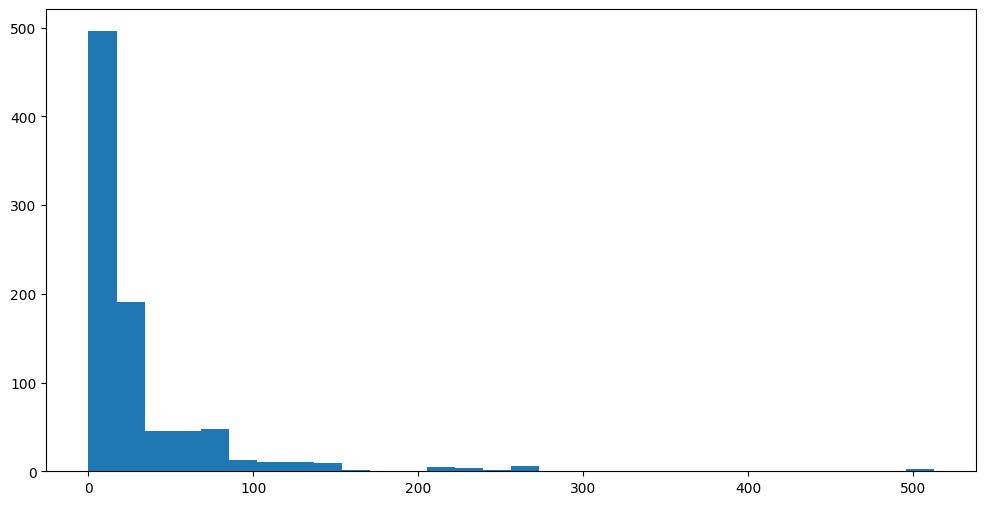

In [21]:
plt.hist(
    data=train_df,
    x='Fare',
    bins=30,
)

In [22]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
train_df[train_df['Fare'] == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

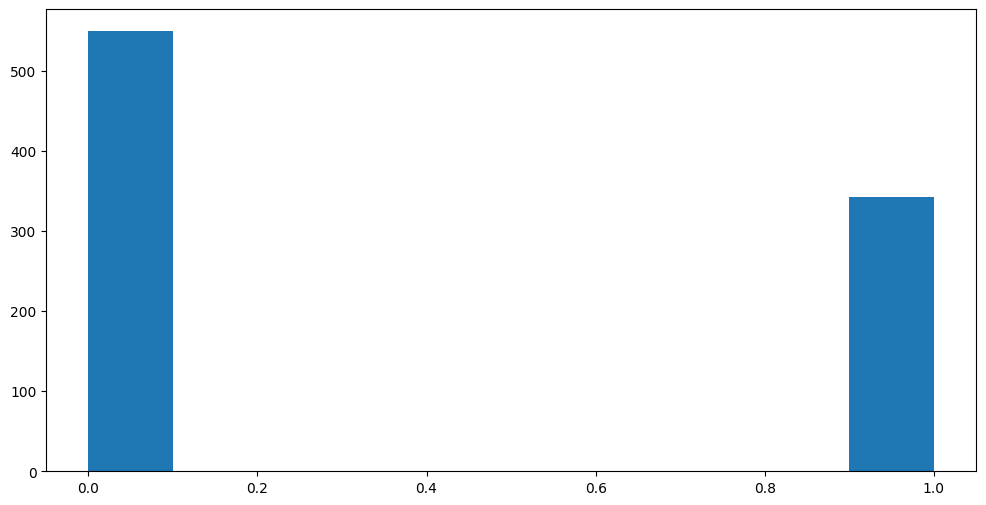

In [24]:
plt.hist(
    data=train_df,
    x='Survived'
)

In [25]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
numeric_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [27]:
numeric_cols = numeric_cols.delete(0)

In [28]:
numeric_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<Axes: >

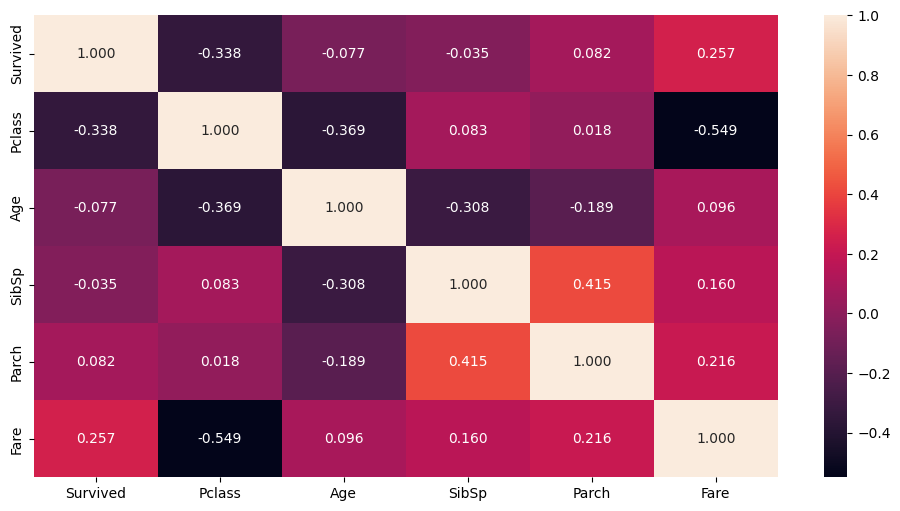

In [29]:
sns.heatmap(train_df[numeric_cols].corr(), annot=True, fmt=".3f")

In [30]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

In [35]:
train_df['Title'] = train_df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
val_df['Title'] = val_df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       519
Embarked      2
Title         0
dtype: int64

In [38]:
val_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       168
Embarked      0
Title         0
dtype: int64

In [39]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [40]:
train_df.drop('Name', axis=1, inplace=True)
val_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [41]:
numeric_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [42]:
categorical_cols = train_df.select_dtypes(include='object').columns

In [43]:
categorical_cols

Index(['Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'], dtype='object')

In [44]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
298,1,1,male,NaN,0,0,19988,30.5000,C106,S,Mr
884,0,3,male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr
247,1,2,female,24.00,0,2,250649,14.5000,NaN,S,Mrs
478,0,3,male,22.00,0,0,350060,7.5208,NaN,S,Mr
305,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S,Master
...,...,...,...,...,...,...,...,...,...,...,...
106,1,3,female,21.00,0,0,343120,7.6500,NaN,S,Miss
270,0,1,male,NaN,0,0,113798,31.0000,NaN,S,Mr
860,0,3,male,41.00,2,0,350026,14.1083,NaN,S,Mr
435,1,1,female,14.00,1,2,113760,120.0000,B96 B98,S,Miss


In [45]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [46]:
imputer.fit(train_df[numeric_cols])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [47]:
test_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [48]:
test_numeric_cols = numeric_cols.delete(0)

In [49]:
test_imputer.fit(test_df[test_numeric_cols])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [50]:
numeric_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [51]:
train_df[numeric_cols] = imputer.transform(train_df[numeric_cols])
val_df[numeric_cols] = imputer.transform(val_df[numeric_cols])
test_df[test_numeric_cols] = test_imputer.transform(test_df[test_numeric_cols])

In [52]:
train_df[numeric_cols].isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [53]:
test_df[test_numeric_cols].isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [54]:
val_df[numeric_cols].isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [55]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
298,1.0,1.0,male,29.421343,0.0,0.0,19988,30.5000,C106,S,Mr
884,0.0,3.0,male,25.000000,0.0,0.0,SOTON/OQ 392076,7.0500,NaN,S,Mr
247,1.0,2.0,female,24.000000,0.0,2.0,250649,14.5000,NaN,S,Mrs
478,0.0,3.0,male,22.000000,0.0,0.0,350060,7.5208,NaN,S,Mr
305,1.0,1.0,male,0.920000,1.0,2.0,113781,151.5500,C22 C26,S,Master
...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,3.0,female,21.000000,0.0,0.0,343120,7.6500,NaN,S,Miss
270,0.0,1.0,male,29.421343,0.0,0.0,113798,31.0000,NaN,S,Mr
860,0.0,3.0,male,41.000000,2.0,0.0,350026,14.1083,NaN,S,Mr
435,1.0,1.0,female,14.000000,1.0,2.0,113760,120.0000,B96 B98,S,Miss


In [56]:
train_df.drop('Ticket', axis=1, inplace=True)
val_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)

In [57]:
categorical_cols = train_df.select_dtypes(include='object').columns

In [58]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
298,1.0,1.0,male,29.421343,0.0,0.0,30.5000,C106,S,Mr
884,0.0,3.0,male,25.000000,0.0,0.0,7.0500,NaN,S,Mr
247,1.0,2.0,female,24.000000,0.0,2.0,14.5000,NaN,S,Mrs
478,0.0,3.0,male,22.000000,0.0,0.0,7.5208,NaN,S,Mr
305,1.0,1.0,male,0.920000,1.0,2.0,151.5500,C22 C26,S,Master
...,...,...,...,...,...,...,...,...,...,...
106,1.0,3.0,female,21.000000,0.0,0.0,7.6500,NaN,S,Miss
270,0.0,1.0,male,29.421343,0.0,0.0,31.0000,NaN,S,Mr
860,0.0,3.0,male,41.000000,2.0,0.0,14.1083,NaN,S,Mr
435,1.0,1.0,female,14.000000,1.0,2.0,120.0000,B96 B98,S,Miss


In [59]:
val_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
709,1.0,3.0,male,29.421343,1.0,1.0,15.2458,NaN,C,Master
439,0.0,2.0,male,31.000000,0.0,0.0,10.5000,NaN,S,Mr
840,0.0,3.0,male,20.000000,0.0,0.0,7.9250,NaN,S,Mr
720,1.0,2.0,female,6.000000,0.0,1.0,33.0000,NaN,S,Miss
39,1.0,3.0,female,14.000000,1.0,0.0,11.2417,NaN,C,Miss
...,...,...,...,...,...,...,...,...,...,...
880,1.0,2.0,female,25.000000,0.0,1.0,26.0000,NaN,S,Mrs
425,0.0,3.0,male,29.421343,0.0,0.0,7.2500,NaN,S,Mr
101,0.0,3.0,male,29.421343,0.0,0.0,7.8958,NaN,S,Mr
199,0.0,2.0,female,24.000000,0.0,0.0,13.0000,NaN,S,Miss


In [60]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3.0,male,34.50000,0.0,0.0,7.8292,NaN,Q,Mr
1,893,3.0,female,47.00000,1.0,0.0,7.0000,NaN,S,Mrs
2,894,2.0,male,62.00000,0.0,0.0,9.6875,NaN,Q,Mr
3,895,3.0,male,27.00000,0.0,0.0,8.6625,NaN,S,Mr
4,896,3.0,female,22.00000,1.0,1.0,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,1305,3.0,male,30.27259,0.0,0.0,8.0500,NaN,S,Mr
414,1306,1.0,female,39.00000,0.0,0.0,108.9000,C105,C,Dona
415,1307,3.0,male,38.50000,0.0,0.0,7.2500,NaN,S,Mr
416,1308,3.0,male,30.27259,0.0,0.0,8.0500,NaN,S,Mr


In [61]:
train_df[categorical_cols].isna().sum()

Sex           0
Cabin       519
Embarked      2
Title         0
dtype: int64

In [62]:
val_df[categorical_cols].isna().sum()

Sex           0
Cabin       168
Embarked      0
Title         0
dtype: int64

In [63]:
test_df[categorical_cols].isna().sum()

Sex           0
Cabin       327
Embarked      0
Title         0
dtype: int64

In [64]:
train_df.drop('Cabin', inplace=True, axis=1)
val_df.drop('Cabin', inplace=True, axis=1)
test_df.drop('Cabin', inplace=True, axis=1)

In [65]:
categorical_cols = train_df.select_dtypes(include='object').columns

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
enc = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')  

In [68]:
enc.fit(train_df[categorical_cols])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [69]:
categorical_cols

Index(['Sex', 'Embarked', 'Title'], dtype='object')

In [70]:
enc.get_feature_names_out()

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan', 'Title_Capt', 'Title_Col', 'Title_Dr',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss',
       'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
       'Title_Rev', 'Title_the Countess'], dtype=object)

In [71]:
categorical_cols

Index(['Sex', 'Embarked', 'Title'], dtype='object')

In [72]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
298,1.0,1.0,male,29.421343,0.0,0.0,30.5000,S,Mr
884,0.0,3.0,male,25.000000,0.0,0.0,7.0500,S,Mr
247,1.0,2.0,female,24.000000,0.0,2.0,14.5000,S,Mrs
478,0.0,3.0,male,22.000000,0.0,0.0,7.5208,S,Mr
305,1.0,1.0,male,0.920000,1.0,2.0,151.5500,S,Master
...,...,...,...,...,...,...,...,...,...
106,1.0,3.0,female,21.000000,0.0,0.0,7.6500,S,Miss
270,0.0,1.0,male,29.421343,0.0,0.0,31.0000,S,Mr
860,0.0,3.0,male,41.000000,2.0,0.0,14.1083,S,Mr
435,1.0,1.0,female,14.000000,1.0,2.0,120.0000,S,Miss


In [73]:
X_train_encoded = enc.transform(train_df[categorical_cols])
X_val_encoded = enc.transform(val_df[categorical_cols])
X_test_encoded = enc.transform(test_df[categorical_cols])

encoded_col_names = enc.get_feature_names_out(categorical_cols)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_col_names, index=train_df.index)
X_val_encoded_df   = pd.DataFrame(X_val_encoded,   columns=encoded_col_names, index=val_df.index)
X_test_encoded_df  = pd.DataFrame(X_test_encoded,  columns=encoded_col_names, index=test_df.index)

X_train = pd.concat([train_df[numeric_cols].reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_val = pd.concat([val_df[numeric_cols].reset_index(drop=True), X_val_encoded_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([test_df[test_numeric_cols].reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [74]:
X_train.isna().sum()

Survived              0
Pclass                0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Embarked_nan          0
Title_Capt            0
Title_Col             0
Title_Dr              0
Title_Lady            0
Title_Major           0
Title_Master          0
Title_Miss            0
Title_Mlle            0
Title_Mme             0
Title_Mr              0
Title_Mrs             0
Title_Ms              0
Title_Rev             0
Title_the Countess    0
dtype: int64

In [75]:
X_val.isna().sum()

Survived              0
Pclass                0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Embarked_nan          0
Title_Capt            0
Title_Col             0
Title_Dr              0
Title_Lady            0
Title_Major           0
Title_Master          0
Title_Miss            0
Title_Mlle            0
Title_Mme             0
Title_Mr              0
Title_Mrs             0
Title_Ms              0
Title_Rev             0
Title_the Countess    0
dtype: int64

In [76]:
X_test.isna().sum()

Pclass                0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Embarked_nan          0
Title_Capt            0
Title_Col             0
Title_Dr              0
Title_Lady            0
Title_Major           0
Title_Master          0
Title_Miss            0
Title_Mlle            0
Title_Mme             0
Title_Mr              0
Title_Mrs             0
Title_Ms              0
Title_Rev             0
Title_the Countess    0
dtype: int64

In [77]:
X_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_the Countess
0,1.0,1.0,29.421343,0.0,0.0,30.5000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,3.0,25.000000,0.0,0.0,7.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,2.0,24.000000,0.0,2.0,14.5000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,3.0,22.000000,0.0,0.0,7.5208,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.920000,1.0,2.0,151.5500,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,1.0,3.0,21.000000,0.0,0.0,7.6500,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,1.0,29.421343,0.0,0.0,31.0000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
665,0.0,3.0,41.000000,2.0,0.0,14.1083,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
666,1.0,1.0,14.000000,1.0,2.0,120.0000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
lgrg_X_train = X_train.copy()
lgrg_X_val = X_val.copy()
lgrg_X_test = X_test.copy()

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler(copy=False)

In [81]:
numeric_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [82]:
scaler.fit(lgrg_X_train[numeric_cols[1:]])

,copy,False
,with_mean,True
,with_std,True


In [83]:
test_scaler = StandardScaler(copy=False)
test_scaler.fit(lgrg_X_train[test_numeric_cols])

,copy,False
,with_mean,True
,with_std,True


In [84]:
numeric_cols = numeric_cols.delete(0)

In [85]:
lgrg_X_train[numeric_cols] = scaler.transform(lgrg_X_train[numeric_cols])
lgrg_X_val[numeric_cols] = scaler.transform(lgrg_X_val[numeric_cols])
lgrg_X_test[test_numeric_cols] = test_scaler.transform(lgrg_X_test[test_numeric_cols])

In [86]:
lgrg_X_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_the Countess
0,1.0,-1.620517,0.000000,-0.467660,-0.468878,-0.032568,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.809349,-0.340110,-0.467660,-0.468878,-0.487331,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,-0.405584,-0.417034,-0.467660,2.046870,-0.342854,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.809349,-0.570884,-0.467660,-0.468878,-0.478201,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,-1.620517,-2.192453,0.376656,2.046870,2.314937,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,1.0,0.809349,-0.647808,-0.467660,-0.468878,-0.475695,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,-1.620517,0.000000,-0.467660,-0.468878,-0.022872,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
665,0.0,0.809349,0.890683,1.220971,-0.468878,-0.350450,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
666,1.0,-1.620517,-1.186280,0.376656,2.046870,1.703093,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
lgrg_X_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_the Countess
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.0,418.000000,418.000000,418.0,418.0,418.000000,418.000000,418.000000,418.000000,418.0
mean,-0.082958,0.065482,-0.089940,0.024642,0.066863,0.363636,0.636364,0.244019,0.110048,0.645933,...,0.0,0.050239,0.186603,0.0,0.0,0.574163,0.172249,0.002392,0.004785,0.0
std,1.022776,0.971906,0.757148,1.234514,1.082907,0.481622,0.481622,0.430019,0.313324,0.478803,...,0.0,0.218700,0.390059,0.0,0.0,0.495062,0.378049,0.048912,0.069088,0.0
min,-1.620517,-2.250147,-0.467660,-0.468878,-0.624051,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,-1.620517,-0.493959,-0.467660,-0.468878,-0.470928,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.809349,0.065482,-0.467660,-0.468878,-0.343742,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.809349,0.486829,0.376656,-0.468878,-0.013175,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0
max,0.809349,3.583042,6.286861,10.851991,9.311478,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [88]:
lgrg_X_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
       'Title_Capt', 'Title_Col', 'Title_Dr', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_the Countess'],
      dtype='object')

In [89]:
input_cols = lgrg_X_train.columns.delete(0)

In [90]:
input_cols

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Title_Capt',
       'Title_Col', 'Title_Dr', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_the Countess'],
      dtype='object')

In [91]:
lgrg_X_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_the Countess
0,1.0,-1.620517,0.000000,-0.467660,-0.468878,-0.032568,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.809349,-0.340110,-0.467660,-0.468878,-0.487331,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,-0.405584,-0.417034,-0.467660,2.046870,-0.342854,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.809349,-0.570884,-0.467660,-0.468878,-0.478201,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,-1.620517,-2.192453,0.376656,2.046870,2.314937,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,1.0,0.809349,-0.647808,-0.467660,-0.468878,-0.475695,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,-1.620517,0.000000,-0.467660,-0.468878,-0.022872,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
665,0.0,0.809349,0.890683,1.220971,-0.468878,-0.350450,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
666,1.0,-1.620517,-1.186280,0.376656,2.046870,1.703093,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
%%time
logreg = LogisticRegression(solver='liblinear').fit(lgrg_X_train[input_cols], lgrg_X_train[target_col])

CPU times: user 1.98 ms, sys: 881 μs, total: 2.86 ms
Wall time: 2.29 ms


In [93]:
preds = logreg.predict(lgrg_X_train[input_cols])

In [94]:
preds

array([0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(lgrg_X_train[target_col],preds)

0.8398203592814372

In [97]:
preds = logreg.predict(lgrg_X_val[input_cols])

In [98]:
accuracy_score(lgrg_X_val[target_col],preds)

0.8116591928251121

In [99]:
logregpreds = logreg.predict(lgrg_X_test[input_cols])

In [100]:
logregpreds

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [101]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": logregpreds.astype(int)  # or whatever your model's output is
})
submission.to_csv("submission.csv", index=False)


In [102]:
X_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_the Countess
0,1.0,1.0,29.421343,0.0,0.0,30.5000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,3.0,25.000000,0.0,0.0,7.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,2.0,24.000000,0.0,2.0,14.5000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,3.0,22.000000,0.0,0.0,7.5208,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.920000,1.0,2.0,151.5500,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,1.0,3.0,21.000000,0.0,0.0,7.6500,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,1.0,29.421343,0.0,0.0,31.0000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
665,0.0,3.0,41.000000,2.0,0.0,14.1083,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
666,1.0,1.0,14.000000,1.0,2.0,120.0000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
X_val

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_the Countess
0,1.0,3.0,29.421343,1.0,1.0,15.2458,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,31.000000,0.0,0.0,10.5000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,3.0,20.000000,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,2.0,6.000000,0.0,1.0,33.0000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,14.000000,1.0,0.0,11.2417,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1.0,2.0,25.000000,0.0,1.0,26.0000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
219,0.0,3.0,29.421343,0.0,0.0,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,0.0,3.0,29.421343,0.0,0.0,7.8958,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,0.0,2.0,24.000000,0.0,0.0,13.0000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_the Countess
0,3.0,34.50000,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.0,47.00000,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,62.00000,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.0,27.00000,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,22.00000,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,30.27259,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
414,1.0,39.00000,0.0,0.0,108.9000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,3.0,38.50000,0.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
416,3.0,30.27259,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [105]:
randomforest = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=6)

In [106]:
%%time
randomforest.fit(X_train[input_cols], X_train[target_col])

CPU times: user 57 ms, sys: 24.7 ms, total: 81.7 ms
Wall time: 64.8 ms


,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [107]:
preds = randomforest.predict(X_train[input_cols])

In [108]:
accuracy_score(X_train[target_col], preds)

0.875748502994012

In [109]:
def try_params_random_forest(estimators, depth, X):
    model = RandomForestClassifier(n_jobs=-1, max_depth=depth, n_estimators=estimators)
    model.fit(X[input_cols], X[target_col])
    preds = model.predict(X[input_cols])
    return [accuracy_score(X[target_col], preds), model]


In [110]:
%%time
result = try_params_random_forest(600, 10, X=X_train)
model = result[1]
accuracy = result[0]
accuracy

CPU times: user 368 ms, sys: 115 ms, total: 482 ms
Wall time: 299 ms


0.938622754491018

In [111]:
accuracy_score(X_val[target_col], model.predict(X_val[input_cols]))

0.820627802690583

In [112]:
model = RandomForestClassifier(n_jobs=-1, max_depth=10, n_estimators=600).fit(X_train[input_cols], X_train[target_col])

In [113]:
randomforest_preds = model.predict(X_test[input_cols])

In [114]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": randomforest_preds.astype(int)  # or whatever your model's output is
})
submission.to_csv("submission.csv", index=False)

In [204]:
from xgboost import XGBClassifier

In [213]:
model = XGBClassifier(n_jobs=-1, random_state=42, enable_categorical=True, max_depth=5, n_estimators=335)

In [222]:
%%time
model.fit(X_train[input_cols], X_train[target_col])

CPU times: user 159 ms, sys: 638 ms, total: 797 ms
Wall time: 330 ms


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,None


In [223]:
preds = model.predict(X_train[input_cols])
accuracy_score(X_train[target_col], preds)

0.9805389221556886

In [224]:
preds = model.predict(X_val[input_cols])
accuracy_score(X_val[target_col], preds)

0.8116591928251121

In [225]:
final_preds = model.predict(X_test)

In [226]:
final_preds

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [227]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": final_preds.astype(int)  # or whatever your model's output is
})
submission.to_csv("submission.csv", index=False)